## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [1]:
# importing modules
import numpy as np
import pandas as pd

In [2]:
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv(r"C:\Users\Shruti\OneDrive\Data Science\PYTHON\Python 3\DATA\ALLIMPORTS\yearly_deaths_by_clinic.csv")

In [3]:
# Print out yearly
print(yearly)
display(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [4]:
# Calculate proportion of deaths per no. births
yearly['pro_deaths'] = yearly['deaths']/yearly['births']
k = pd.crosstab( yearly['year'] , yearly['clinic'] , values = yearly['pro_deaths'] , aggfunc='mean' )*100
k

clinic,clinic 1,clinic 2
year,,
1841,7.806324,3.521704
1842,15.759051,7.596841
1843,8.954248,5.987587
1844,8.235667,2.300406
1845,6.901489,2.036409
1846,11.446384,2.797017


In [5]:
# Check the mean proportion of deaths in both the clinics
pd.crosstab( yearly['year'] , yearly['clinic'] , values = yearly['pro_deaths'] , aggfunc = 'mean' , margins = True )*100

clinic,clinic 1,clinic 2,All
year,,,
1841,7.806324,3.521704,5.664014
1842,15.759051,7.596841,11.677946
1843,8.954248,5.987587,7.470918
1844,8.235667,2.300406,5.268036
1845,6.901489,2.036409,4.468949
1846,11.446384,2.797017,7.121700
All,9.850527,4.039994,6.945260


The above numbers clearly indicate that death proportion is higher in Clinic 1. Check if this is the pattern for each year or is purely random.

If proportion of death is higher for clinic 1, every single year. we can safely assume that there is some issue particularly with Clinic 1 & that it is not a random factor

In [6]:
# Check proportion of death for each year 
pd.pivot_table( yearly , index = [ 'year' , 'clinic' ] , values = 'pro_deaths' , aggfunc = 'sum' )*100

pro_deaths
year clinic              
1841 clinic 1    7.806324
     clinic 2    3.521704
1842 clinic 1   15.759051
     clinic 2    7.596841
1843 clinic 1    8.954248
     clinic 2    5.987587
1844 clinic 1    8.235667
     clinic 2    2.300406
1845 clinic 1    6.901489
     clinic 2    2.036409
1846 clinic 1   11.446384
     clinic 2    2.797017

In [7]:
# create a column name 'difference' which is clinic 1 death proportion - clinic 2 death proportion 
k['difference'] = k['clinic 1'] - k['clinic 2']
k

clinic,clinic 1,clinic 2,difference
year,,,
1841,7.806324,3.521704,4.284621
1842,15.759051,7.596841,8.162210
1843,8.954248,5.987587,2.966662
1844,8.235667,2.300406,5.935261
1845,6.901489,2.036409,4.865081
1846,11.446384,2.797017,8.649368


In [8]:
# print the 5 point summary for 'difference'
k.describe()

clinic,clinic 1,clinic 2,difference
count,6.000000,6.000000,6.000000
mean,9.850527,4.039994,5.810534
std,3.278539,2.249374,2.232255
min,6.901489,2.036409,2.966662
25%,7.913660,2.424559,4.429736
50%,8.594958,3.159360,5.400171
75%,10.823350,5.371116,7.605473
max,15.759051,7.596841,8.649368


We have clear evidence now that there is something fishy with Clinic 1's method of treatment. As clearly the death proportion is higher every single year.

## 3. The handwashing begins
<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

The Clinic 1 monthly file is a sub-divided based on years. Let us first prepare a structured dataset for our analysis 

In [9]:
# Read dataset/monthly_deaths using excelfile
monthly_deaths = pd.ExcelFile(r"C:\Users\Shruti\OneDrive\Data Science\PYTHON\Python 3\DATA\ALLIMPORTS\monthly_deaths.xlsx")

In [10]:
# print all sheet names
monthly_deaths.sheet_names

['c1_41',
 'c1_42',
 'c1_43',
 'c1_44',
 'c1_45',
 'c1_46',
 'c1_47',
 'c1_48',
 'c1_49']

Import all files 
* either using a for loop & save it in a dictionary (OR) 
* import each file one after the other

In [11]:
# import all files using
dfs = {}
for i in monthly_deaths.sheet_names:
    dfs[i] = pd.read_excel(monthly_deaths , sheet_name = i)

Inspect column names & data types for each dataset using a for loop

In [12]:
# using for loop inspect column names & data type for each dataset
for i,df in dfs.items():
    print(i)
    print('--'*45)
    print(df.columns)
    print('--'*45)
    print(df.dtypes)

c1_41
------------------------------------------------------------------------------------------
Index(['date', 'births', 'deaths'], dtype='object')
------------------------------------------------------------------------------------------
date      object
births     int64
deaths    object
dtype: object
c1_42
------------------------------------------------------------------------------------------
Index(['date', 'births', 'deaths'], dtype='object')
------------------------------------------------------------------------------------------
date      object
births     int64
deaths     int64
dtype: object
c1_43
------------------------------------------------------------------------------------------
Index(['date', 'births', 'deaths'], dtype='object')
------------------------------------------------------------------------------------------
date      object
births     int64
deaths     int64
dtype: object
c1_44
-------------------------------------------------------------------------------

Pay special attention to c1_41 & c1_47 

In [13]:
# rename column for c1_47
dfs['c1_47'].rename( columns = { 'death' : 'deaths' } , inplace = True)

In [14]:
# change text 'fifty' to numeric 50
dfs['c1_41']['deaths'] = np.where( (dfs['c1_41']['deaths'] == 'fifty') , 50 , dfs['c1_41']['deaths'] )

In [15]:
# convert deaths from object to numeric
dfs['c1_41']['deaths'] = dfs['c1_41']['deaths'].astype(int)

In [16]:
# check dtype for c1_41 again & confirm if it is in suitable format
dfs['c1_41'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    12 non-null     object
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 372.0+ bytes


Now that we have made all the datasets in the same format. Let us append all of them.

In [17]:
# append using loop, concat or append function
df = pd.DataFrame()
for i in dfs:
     df = pd.concat( [df , dfs[i]] , ignore_index = True )
df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
94,1848-11-01,310,9
95,1848-12-01,373,5
96,1849-01-01,403,9
97,1849-02-01,389,12


In [18]:
# print head & tail of the final data set
display(df.head())
display(df.tail())
df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


,date,births,deaths
94,1848-11-01,310,9
95,1848-12-01,373,5
96,1849-01-01,403,9
97,1849-02-01,389,12
98,1849-03-01,406,20


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
94,1848-11-01,310,9
95,1848-12-01,373,5
96,1849-01-01,403,9
97,1849-02-01,389,12


Now that we have prepared the data

## 4. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

In [19]:
# Create the death proportion column, which is 'death'/'births'
df['death_proportion'] = df['deaths'].divide(df['births'])*100

In [20]:
# create a year column but before that, convert object to datetime
df['date'] = pd.to_datetime(df['date'])

In [21]:
# create a year column
df['year'] = df['date'].dt.year

In [22]:
# Check year wise proportion of death & confirm if it reduced drastically after a particular year
pd.pivot_table(df , index = 'year' , values = 'death_proportion' , aggfunc = 'mean')

,death_proportion
year,
1841,8.435507
1842,17.680815
1843,8.894698
1844,8.833565
1845,7.423397
1846,13.843926
1847,5.044240
1848,1.240796
1849,3.414731


It appears that mostly from 1847 onwards, the death proportion reduced. Let us deep dive in the year 1847 & track it at monthly level

In [23]:
# Check monthly proportion of death for the year 1847
pd.pivot_table(df[df['year'] == 1847] , index = df['date'].dt.month , values = 'death_proportion' , aggfunc = 'mean')

,death_proportion
date,
1,3.215434
2,1.923077
3,3.606557
4,18.269231
5,12.244898
6,2.238806
7,1.200000
8,1.893939
9,4.580153


## 5. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

In [24]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [25]:
# Split dataframe into before and after handwashing_start (which we have created in the above cell)
before_washing = df.loc[:77]
after_washing = df.loc[78:]

<p> Visual proof of how effective, handwashing excercise was. <p>
 
The below code will run only if : 
* datasets name are 'before_washing' & 'after_washing'
* there is a column named 'date' in datetime 
* the column name for proportion of death is 'death_proportion'

Text(0, 0.5, 'Proportion deaths')

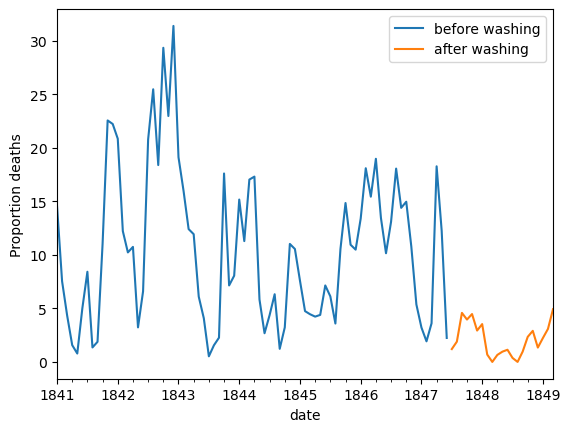

In [26]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='death_proportion', label = 'before washing')
after_washing.plot(x='date', y='death_proportion', label = 'after washing', ax= ax)
ax.set_ylabel('Proportion deaths')

## 6. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [27]:
# Difference in mean monthly proportion of deaths due to handwashing
t = pd.pivot_table( before_washing,
               index = before_washing['date'].dt.month,
               values = 'death_proportion',
               aggfunc = 'mean' ).subtract( pd.pivot_table(after_washing,
                                                       index = after_washing['date'].dt.month,
                                                       values = 'death_proportion',
                                                       aggfunc = 'mean') )
t.mean()

death_proportion    8.679673
dtype: float64

## 7. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

# THE END